# Importing Libraries

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import backend as K

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing Dataset

In [2]:
from keras.datasets import cifar10

In [3]:
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering('th')

# Setting Parameters

In [4]:
batch_size = 32
num_classes = 10
epochs = 100

# Splitting Data into Train Test Sets

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Displaying 10 Random images

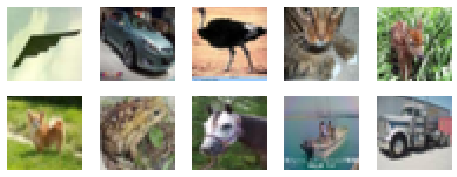

In [6]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    plt.imshow(im)

plt.show()

# Converting Output Labels into Categorical Matrices

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Converting Input Data into float32

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

# Instatntiating our Sequential Model

In [0]:
classifier = Sequential()

# 1st Layer
<ol>
    <li>Convolution Layer: ReLU Activation Function, 
    <li>Convolution Layer: ReLU Activation Function
    <li>Max Pooling Layer (2x2)
    <li>Dropout Layer (25%)
</ol>

In [0]:
classifier.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

# 2nd Layer
<ol>
    <li>Convolution Layer: ReLU Activation Function
    <li>Convolution Layer: ReLU Activation Function
    <li>Max Pooling Layer (2x2)
    <li>Drouput Layer (25%)
<ol />

In [0]:
classifier.add(Conv2D(64, (3,3), activation='relu', padding='same'))
classifier.add(Conv2D(64, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

# 3rd Layer
<ol>
    <li>Flattening Layer
    <li>Densely Connected Layer: ReLU Activation Function
    <li>Dropout Layer (50%)
    
<ol />

In [0]:
classifier.add(Flatten())
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(0.5))

# Output Layer
<ol>
    <li>Densely Connected Layer: Softmax Activation Function

In [0]:
classifier.add(Dense(num_classes, activation='softmax'))

# Compiling our Model
<ul>
    <li>Loss Function: Categorical Cross Entropy
    <li>Optimizer: Adam Optimizer
        

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Summary of Our Model

In [16]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 13, 13)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6, 6)          0         
__________

# Training Our Classifier

In [17]:
cnn = classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 620us/step - loss: 1.5232 - acc: 0.4441 - val_loss: 1.2028 - val_acc: 0.5677
Epoch 2/100
50000/50000 [==============================] - 28s 557us/step - loss: 1.1500 - acc: 0.5926 - val_loss: 1.0119 - val_acc: 0.6378
Epoch 3/100
50000/50000 [==============================] - 28s 557us/step - loss: 1.0121 - acc: 0.6423 - val_loss: 0.8730 - val_acc: 0.6942
Epoch 4/100
50000/50000 [==============================] - 28s 557us/step - loss: 0.9224 - acc: 0.6740 - val_loss: 0.8264 - val_acc: 0.7135
Epoch 5/100
50000/50000 [==============================] - 28s 557us/step - loss: 0.8589 - acc: 0.6983 - val_loss: 0.8370 - val_acc: 0.7123
Epoch 6/100
50000/50000 [==============================] - 28s 555us/step - loss: 0.8099 - acc: 0.7167 - val_loss: 0.7721 - val_acc: 0.7350
Epoch 7/100
50000/50000 [==============================] - 28s 557us/step - loss: 0.7669 - acc: 0.7296 - val_l

# Plotting Accuracy vs Epochs Graph

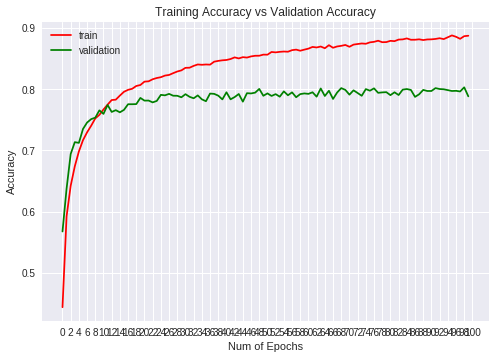

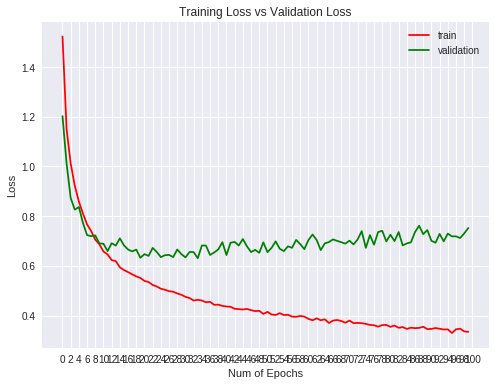

In [21]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0,101,2.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0,101,2.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(['train','validation'])

plt.show()

# Accuracy of our Classifier

In [29]:
scores = classifier.evaluate(X_test, y_test, verbose=0)
print('Acuuracy: ', scores[1]*100)

Acuuracy:  78.83


# Building a Confusion Matrix

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting Test Set Results

In [0]:
Y_pred = classifier.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

# Printing our Confusion Matrix

In [32]:
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test, axis=1), y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[821   9  40  17  13   9   9   9  39  34]
 [  7 871   5   8   2   5   3   0  12  87]
 [ 53   0 656  56  69  88  37  24  10   7]
 [ 16   2  37 579  47 220  38  36  12  13]
 [ 13   1  46  62 735  58  22  54   7   2]
 [  5   1  28 102  26 791   7  34   1   5]
 [  9   7  33  77  26  39 787   9   8   5]
 [  9   0  11  27  28  50   3 859   2  11]
 [ 47  15   6  14   3   7   3   3 869  33]
 [ 10  34   6   6   0   4   4   5  16 915]]


# Plotting our Confusion Matrix

In [0]:
import seaborn as sns
import pandas as pd

# Heatmap for our Confusion Matrix

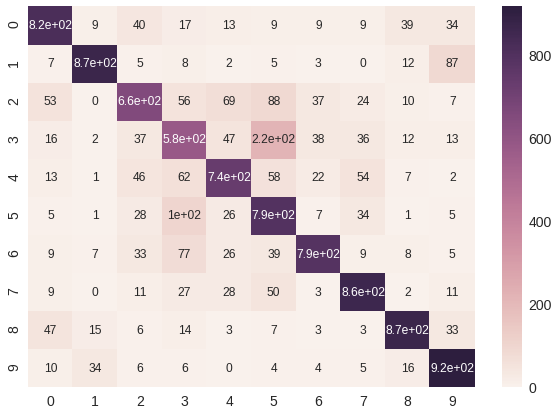

In [34]:
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size":12})
plt.show()